In [3]:
pip install monai==1.2.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -q "monai-weekly[nibabel]"

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


In [32]:
import torch

from monai.transforms import (
    EnsureChannelFirstd,
    LoadImage,
    LoadImaged,
    Orientationd,
    Rand3DElasticd,
    RandAffined,
    Spacingd,
)
from monai.transforms import LoadImage, LoadImaged, Resized, Compose, SaveImage
from monai.config import print_config
from monai.apps import download_and_extract
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import tempfile
import shutil
import os
from glob import glob

print_config()

MONAI version: 1.2.0
Numpy version: 1.24.2
Pytorch version: 2.2.2+cpu
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: c33f1ba588ee00229a309000e888f9817b4f1934
MONAI __file__: c:\Users\phucl\AppData\Local\Programs\Python\Python311\Lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: 5.3.0
Nibabel version: 5.2.1
scikit-image version: 0.22.0
Pillow version: 10.2.0
Tensorboard version: 2.16.2
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: NOT INSTALLED or UNKNOWN VERSION.
tqdm version: 4.66.2
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.8
pandas version: 1.5.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please vis

In [6]:
data_dir = 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/'

train_images = sorted(glob(os.path.join(data_dir, 'TrainData', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'TrainLabel', '*.nii.gz')))

val_images = sorted(glob(os.path.join(data_dir, 'ValidData', '*.nii.gz')))
val_labels = sorted(glob(os.path.join(data_dir, 'ValidLabel', '*.nii.gz')))

train_files = [{"image": image_name, 'label': label_name} for image_name, label_name in zip(train_images, train_labels)]
val_files = [{"image": image_name, 'label': label_name} for image_name, label_name in zip(val_images, val_labels)]

In [7]:
train_files

[{'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400064682.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400064682-label.nii.gz'},
 {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400069812.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400069812-label.nii.gz'},
 {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400071848.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400071848-la

In [8]:
train_files[0]

{'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400064682.nii.gz',
 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400064682-label.nii.gz'}

--Begin Now

In [9]:
loader = LoadImage(dtype=np.float32, image_only=True)
for file in train_files:
    image = loader(file["image"])
    # print(f"input: {train_data_dicts[0]['image']}")
    print(f"image shape: {image.shape}")
    print(f"image affine:\n{image.meta['affine']}")
    print(f"image pixdim:\n{image.pixdim}")


image shape: torch.Size([256, 256, 128])
image affine:
tensor([[ -0.9766,   0.0000,   0.0000, 125.0000],
        [  0.0000,  -0.9766,   0.0000, 111.2000],
        [  0.0000,   0.0000,   1.2500, -55.6250],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
image affine:
tensor([[ -0.9766,   0.0000,   0.0000, 112.9000],
        [  0.0000,  -0.9766,   0.0000, 123.6000],
        [  0.0000,   0.0000,   1.2500, -55.6250],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
image affine:
tensor([[ -0.9766,   0.0000,   0.0000, 141.9000],
        [  0.0000,  -0.9766,   0.0000, 136.1000],
        [  0.0000,   0.0000,   1.2500, -48.3750],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9

In [10]:
loader = LoadImaged(keys=("image", "label"), image_only=False)
for file in train_files:
    data_dict = loader(file)
    # print(f"input:, {train_data_dicts[0]}")
    print(f"image shape: {data_dict['image'].shape}")
    print(f"label shape: {data_dict['label'].shape}")
    print(f"image pixdim:\n{data_dict['image'].pixdim}")

image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tens

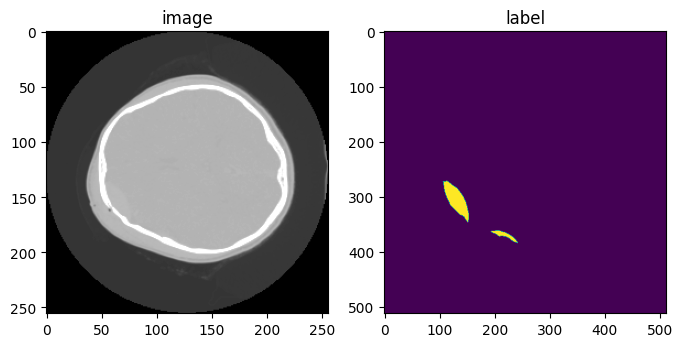

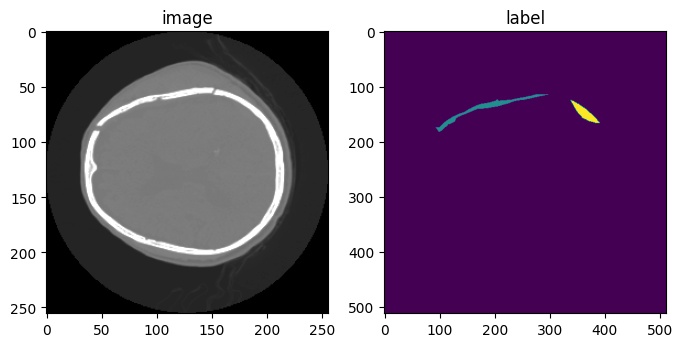

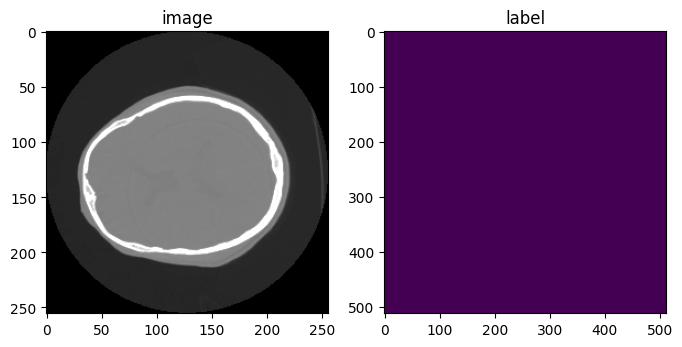

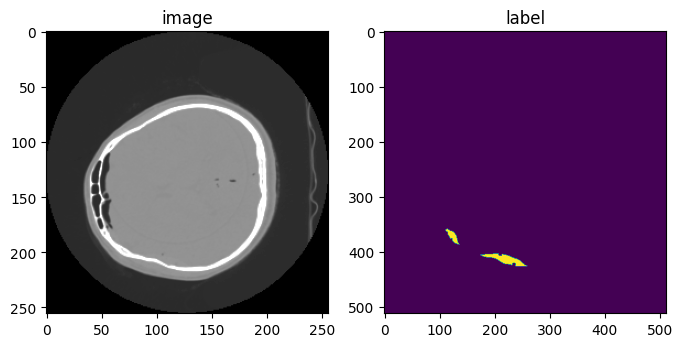

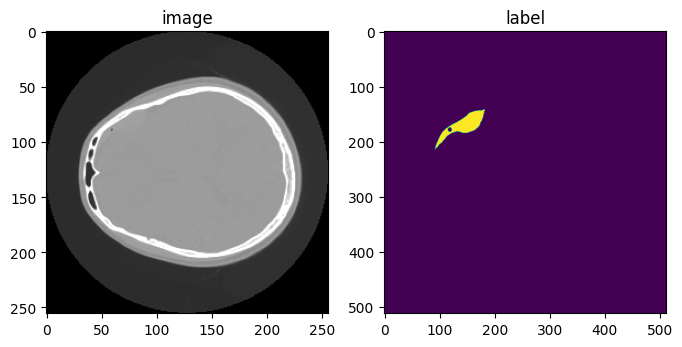

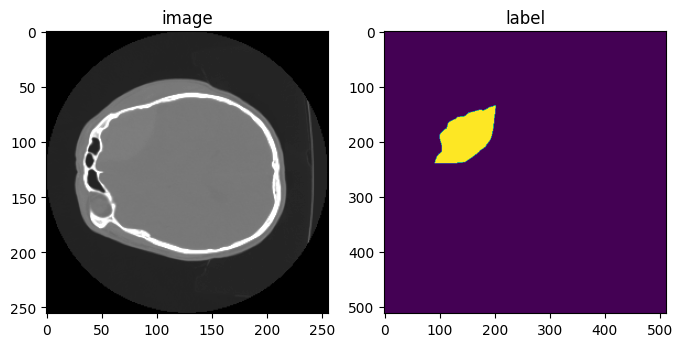

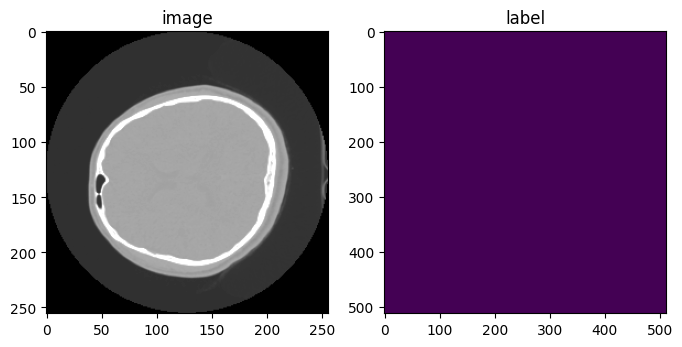

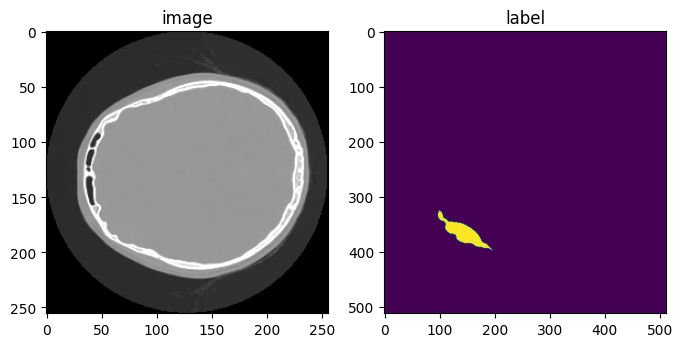

In [11]:
for file in train_files:
    data_dict = loader(file)
    image, label = data_dict["image"], data_dict["label"]
    plt.figure("visualize", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[:, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[:, :, 70])
    plt.show()

In [12]:
#Cập nhật kích thước kênh theo giả định chuyển đổi của thư viện MONAI
ensure_channel_first = EnsureChannelFirstd(keys=["image", "label"])
for file in train_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    print(f"image shape: {datac_dict['image'].shape}")

image shape: torch.Size([1, 256, 256, 128])
image shape: torch.Size([1, 256, 256, 128])
image shape: torch.Size([1, 256, 256, 128])
image shape: torch.Size([1, 256, 256, 128])
image shape: torch.Size([1, 256, 256, 128])
image shape: torch.Size([1, 256, 256, 128])
image shape: torch.Size([1, 256, 256, 128])
image shape: torch.Size([1, 256, 256, 128])


Stage Intensity

In [13]:
#Định hướng trục ban đầu
orientation = Orientationd(keys=["image", "label"], axcodes="RAS")

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -137.8233],
        [   0.0000,    0.0000,    1.2500,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -138.3116],
        [   0.0000,    0.0000,    1.2500,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


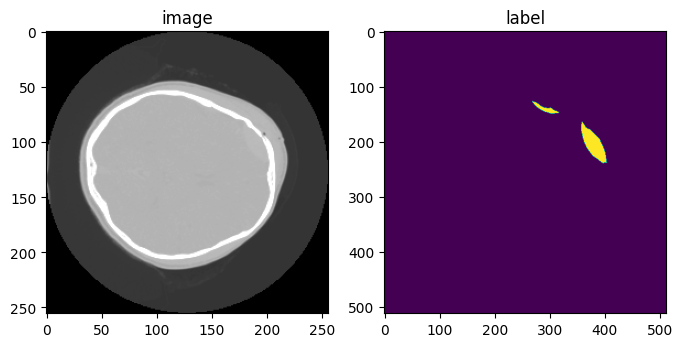

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -136.1233],
        [   0.0000,    0.9766,    0.0000, -125.4233],
        [   0.0000,    0.0000,    1.2500,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -136.6116],
        [   0.0000,    0.4883,    0.0000, -125.9116],
        [   0.0000,    0.0000,    1.2500,  -55.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


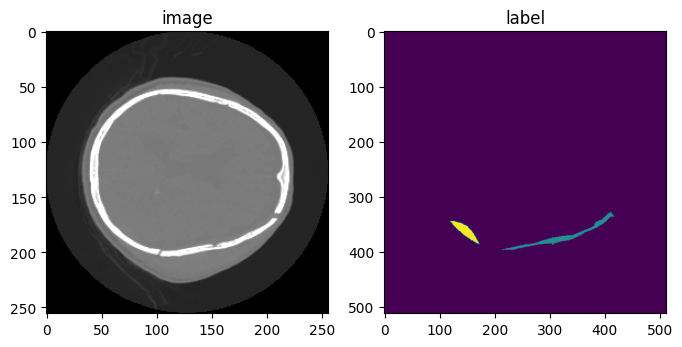

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -107.1233],
        [   0.0000,    0.9766,    0.0000, -112.9233],
        [   0.0000,    0.0000,    1.2500,  -48.3750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -107.6116],
        [   0.0000,    0.4883,    0.0000, -113.4116],
        [   0.0000,    0.0000,    1.2500,  -48.3750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


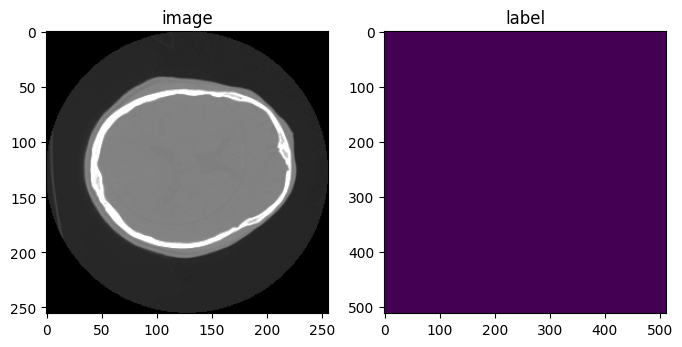

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -133.6233],
        [   0.0000,    0.0000,    1.2500,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -134.1116],
        [   0.0000,    0.0000,    1.2500,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


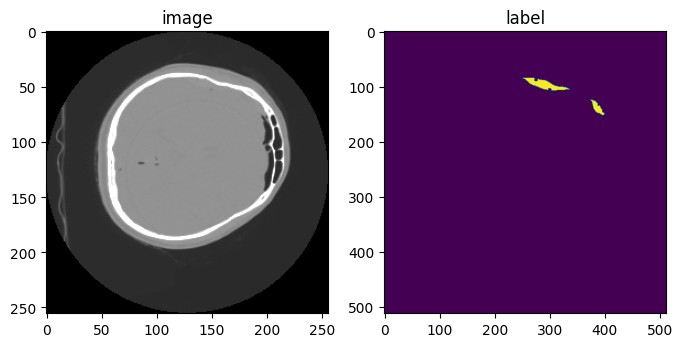

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -142.9233],
        [   0.0000,    0.0000,    1.2500,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -143.4116],
        [   0.0000,    0.0000,    1.2500,  -64.8750],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


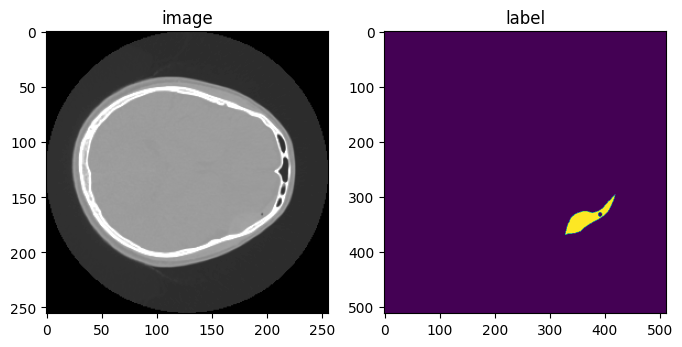

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -134.2383],
        [   0.0000,    0.0000,    1.2500, -169.5380],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -134.7266],
        [   0.0000,    0.0000,    1.2500, -169.5380],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


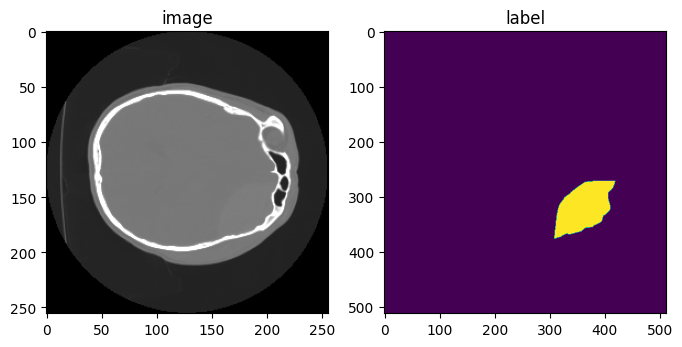

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -115.0233],
        [   0.0000,    0.0000,    1.2500,  -73.1250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -115.5116],
        [   0.0000,    0.0000,    1.2500,  -73.1250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


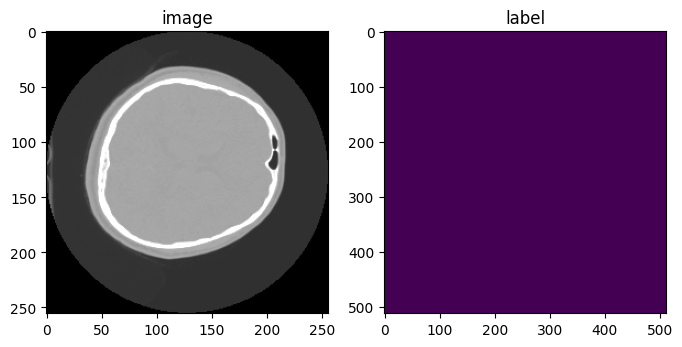

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.8750,    0.0000,    0.0000, -111.1250],
        [   0.0000,    0.8750,    0.0000, -122.3820],
        [   0.0000,    0.0000,    1.2500, -171.6210],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4375,    0.0000,    0.0000, -111.5625],
        [   0.0000,    0.4375,    0.0000, -122.8195],
        [   0.0000,    0.0000,    1.2500, -171.6210],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


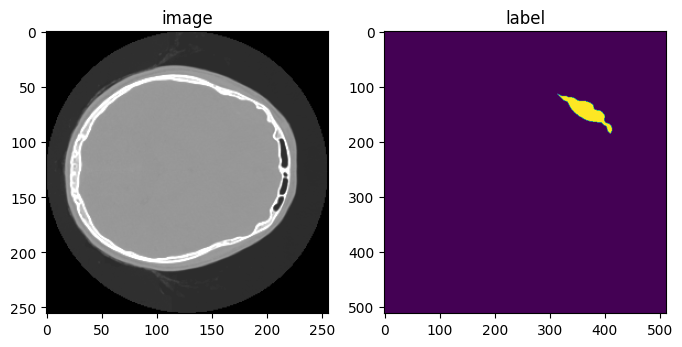

In [14]:
for file in train_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    print(f"image shape: {data_dict_orient['image'].shape}")
    print(f"label shape: {data_dict_orient['label'].shape}")
    print(f"image affine after Orientation:\n{data_dict_orient['image'].meta['affine']}")
    print(f"label affine after Orientation:\n{data_dict_orient['label'].meta['affine']}")

    image, label = data_dict_orient["image"], data_dict_orient["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

In [15]:
#Voxel check
# for i in range(1,4):
#     data_dict_ = loader(train_files[i])
#     data_dict_ = ensure_channel_first(data_dict_)
#     data_dict_ = orientation(data_dict_)
for file in train_files:
    data_dict = loader(file)
    data_dict_channelD = ensure_channel_first(data_dict)
    data_dict_orient = orientation(data_dict_channelD)
    print(f'[sample {file}]')
    print(f"image shape: {data_dict_orient['image'].shape}")
    print(f"label unique: {torch.unique(data_dict_orient['label'])}")
    print(f"image pixdim: {data_dict_orient['image'].pixdim}")

[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400064682.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400064682-label.nii.gz'}]
image shape: torch.Size([1, 256, 256, 128])
label unique: tensor([0., 1.])
image pixdim: tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400069812.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400069812-label.nii.gz'}]
image shape: torch.Size([1, 256, 256, 128])
label unique: tensor([0., 1., 2.])
image pixdim: tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)
[sample {'image': 'L:/St

In [16]:
#Voxel optimize to (1,1,1) milimet
spacing = Spacingd(keys=["image", "label"], pixdim=(1., 1., 1.), mode=("bilinear", "nearest"))

# for i in range(1,4):
#     data_dict_ = loader(train_files[i])
#     data_dict_ = ensure_channel_first(data_dict_)
#     data_dict_ = orientation(data_dict_)
#     print(f'[sample {file}]')
for file in train_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient)
    print(f'[sample {file}]')
    print(f"image shape: {DataD_voxelOpti['image'].shape}")
    print(f"label unique: {torch.unique(DataD_voxelOpti['label'])}")
    print(f"image pixdim: {DataD_voxelOpti['image'].pixdim}")

[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400064682.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400064682-label.nii.gz'}]
image shape: torch.Size([1, 250, 250, 160])
label unique: tensor([0., 1.])
image pixdim: tensor([1., 1., 1.], dtype=torch.float64)
[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData\\2400069812.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel\\2400069812-label.nii.gz'}]
image shape: torch.Size([1, 250, 250, 160])
label unique: tensor([0., 1., 2.])
image pixdim: tensor([1., 1., 1.], dtype=torch.float64)
[sample {'image': 'L:/Study_IDE/MasterReview/job

In [73]:
# trans = Compose([LoadImage(image_only=True), AddChannel(), ToTensor()])
# img = trans(train_files[0]["image"])
# print(type(img), img.shape, img.get_device())

c:\Users\phucl\AppData\Local\Programs\Python\Python311\Lib\site-packages\monai\utils\deprecate_utils.py:111: FutureWarning:

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. It will be removed in version 1.3. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead with `channel_dim='no_channel'`.



<class 'monai.data.meta_tensor.MetaTensor'> torch.Size([1, 512, 512, 32]) -1


    Sử dụng TORCHIO làm nhiễu nền ảnh sau tiền xử lý optimize voxel

In [17]:
pip install torchio==0.18.90

In [18]:
# Hàm thêm hậu tố hỗ trợ lưu file
def add_suffix_to_filename(filename: str, suffix:str) -> str:
  """
  Takes a NIfTI filename and appends a suffix.

  Args:
      filename : NIfTI filename
      suffix : suffix to append

  Returns:
      str : filename after append the suffix
  """
  if filename.endswith('.nii'):
      result = filename.replace('.nii', f'_{suffix}.nii')
      return result
  elif filename.endswith('.nii.gz'):
      result = filename.replace('.nii.gz', f'_{suffix}.nii.gz')
      return result
  else:
      raise RuntimeError('filename with unknown extension')

In [23]:
# Gọi tên file tập ảnh Train
# TrainSet - Image 
import os
filepath = 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainData/'

files = os.listdir(filepath)
print("Files in directory:")
for file in files:
    # print(file)
    basename = os.path.basename(file)
    print(basename)

Files in directory:
2400074037.nii.gz


In [19]:
import torchio as tio
standardize = tio.ZNormalization()

image shape: torch.Size([1, 250, 250, 160])


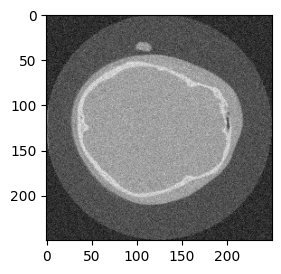

image shape: torch.Size([1, 250, 250, 160])


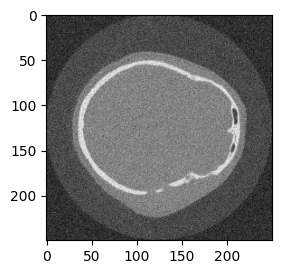

image shape: torch.Size([1, 250, 250, 160])


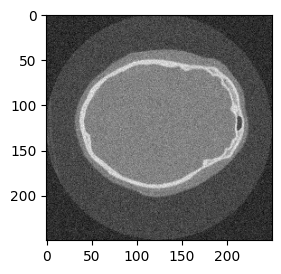

image shape: torch.Size([1, 250, 250, 160])


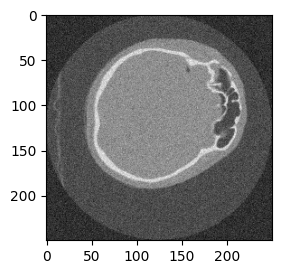

image shape: torch.Size([1, 250, 250, 160])


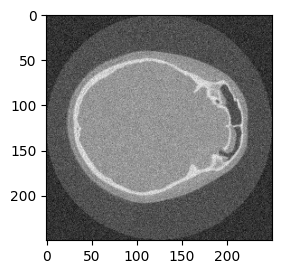

image shape: torch.Size([1, 250, 250, 160])


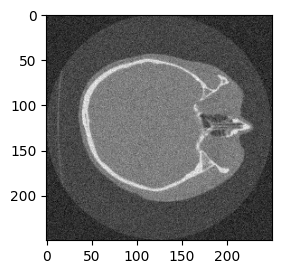

image shape: torch.Size([1, 250, 250, 160])


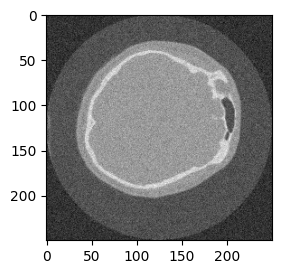

image shape: torch.Size([1, 224, 224, 160])


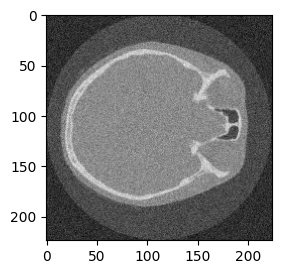

In [20]:
add_noise = tio.RandomNoise(std=0.25) 
# Lặp qua từng ảnh trong tập dữ liệu
for file in train_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient)
    
    # Áp dụng chuẩn hóa và phép biến đổi làm nhiễu || standard để thấy được cấu trúc rõ nét cho phần noise này//
    standard = standardize(DataD_voxelOpti['image'])
    noisy = add_noise(DataD_voxelOpti['image'])
    print(f"image shape: {noisy.shape}")
    # print(len(noisy))
    plt.subplot(1, 2, 2)
    plt.imshow(noisy[0, :, :, 70], cmap="gray")
    plt.show()

    tensorof_Noiseimg = noisy.numpy()
    Noiseimg = tensorof_Noiseimg.squeeze(0)
    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_noise = nib.Nifti1Image(Noiseimg, affine=None)  # Bạn cần cung cấp affine nếu có

    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    out_filename = add_suffix_to_filename(basename, suffix='gaussianNoise')
    nib.save(nifti_image_noise, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/TrainSet/Image/{out_filename}')

    # break

In [36]:
# Lấy file label trong file TrainLabel qua Intensity TrainSet/Label
import os
import shutil

thư_mục_nguồn = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel"
thư_mục_đích = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/TrainSet/Label"

if not os.path.exists(thư_mục_đích):
  os.makedirs(thư_mục_đích)

for file in train_files:
  basename = os.path.basename(file['label'])
  new_filelabelname = add_suffix_to_filename(basename, suffix='gaussianNoise')
  source_path = os.path.join(thư_mục_nguồn, basename)
  destination_path = os.path.join(thư_mục_đích, new_filelabelname)
  shutil.copy2(source_path, destination_path)


    Sử dụng TORCHIO làm mờ nền ảnh tiếp nối các ảnh đã process cân chỉnh tiền xử lý once again

image shape: torch.Size([1, 250, 250, 160])


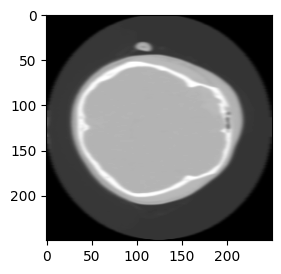

image shape: torch.Size([1, 250, 250, 160])


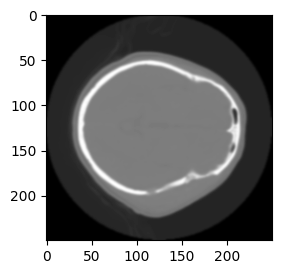

image shape: torch.Size([1, 250, 250, 160])


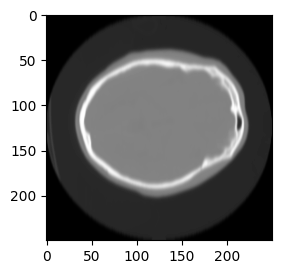

image shape: torch.Size([1, 250, 250, 160])


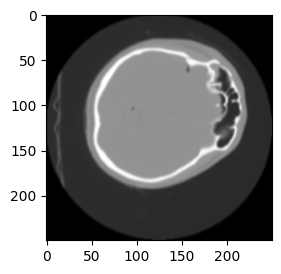

image shape: torch.Size([1, 250, 250, 160])


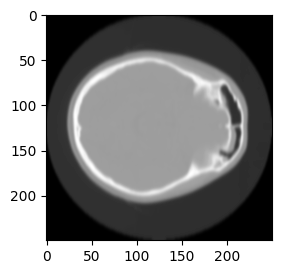

image shape: torch.Size([1, 250, 250, 160])


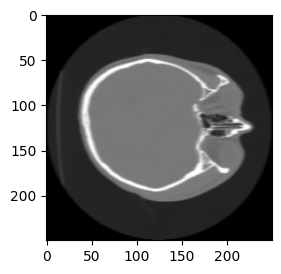

image shape: torch.Size([1, 250, 250, 160])


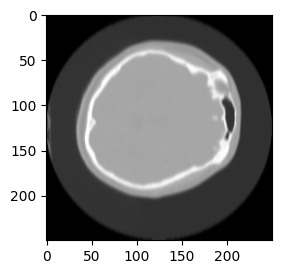

image shape: torch.Size([1, 224, 224, 160])


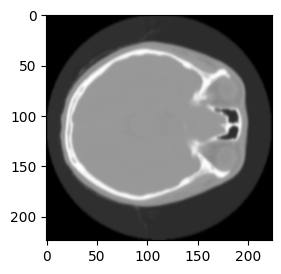

In [37]:
blur = tio.RandomBlur()
# Lặp qua từng ảnh trong tập dữ liệu
for file in train_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient)   
    blurred = blur(DataD_voxelOpti['image'])

    print(f"image shape: {blurred.shape}")
    plt.subplot(1, 2, 2)
    plt.imshow(blurred[0, :, :, 70], cmap="gray")
    plt.show()

    tensorof_Blurimg = blurred.numpy()
    Blurimg = tensorof_Blurimg.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_blur = nib.Nifti1Image(Blurimg, affine=None)  # Bạn cần cung cấp affine nếu có

    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    out_filename = add_suffix_to_filename(basename, suffix='blur')
    nib.save(nifti_image_blur, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/TrainSet/Image/{out_filename}')


In [38]:
# Lấy file label trong file TrainLabel qua Intensity TrainSet/Label
import os
import shutil

thư_mục_nguồn = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel"
thư_mục_đích = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/TrainSet/Label"

if not os.path.exists(thư_mục_đích):
  os.makedirs(thư_mục_đích)

for file in train_files:
  basename = os.path.basename(file['label'])
  new_filelabelname = add_suffix_to_filename(basename, suffix='blur')
  source_path = os.path.join(thư_mục_nguồn, basename)
  destination_path = os.path.join(thư_mục_đích, new_filelabelname)
  shutil.copy2(source_path, destination_path)


    Sử dụng TORCHIO làm dịch chuyển ảnh sau tiền xử lý optimize voxel

image shape: torch.Size([1, 250, 250, 160])


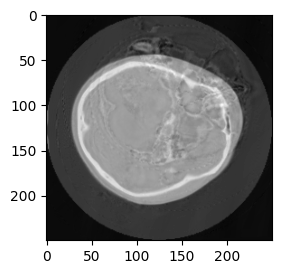

image shape: torch.Size([1, 250, 250, 160])


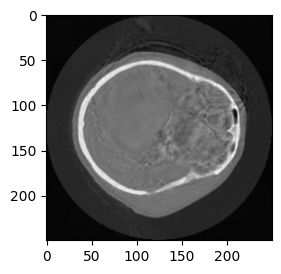

image shape: torch.Size([1, 250, 250, 160])


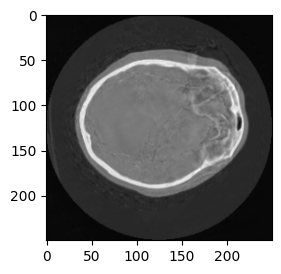

image shape: torch.Size([1, 250, 250, 160])


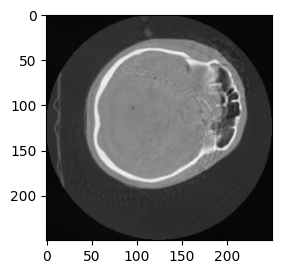

image shape: torch.Size([1, 250, 250, 160])


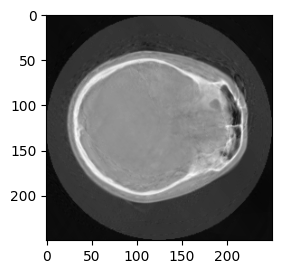

image shape: torch.Size([1, 250, 250, 160])


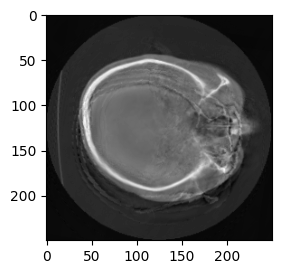

image shape: torch.Size([1, 250, 250, 160])


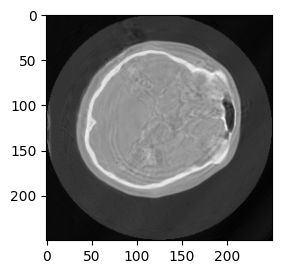

image shape: torch.Size([1, 224, 224, 160])


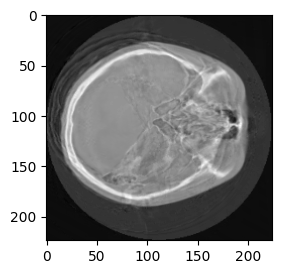

In [39]:
add_motion = tio.RandomMotion(num_transforms=6, image_interpolation='nearest') #kernel size để transform
for file in train_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient) 

    # Áp dụng chuẩn hóa và phép biến đổi làm dịch chuyển
    # standard = standardize(DataD_voxelOpti['image'])
    with_motion = add_motion(DataD_voxelOpti['image'])


    print(f"image shape: {with_motion.shape}")
    plt.subplot(1, 2, 2)
    plt.imshow(with_motion[0, :, :, 70], cmap="gray")
    plt.show()

    tensorof_Motionimg = with_motion.numpy()
    Motionimg = tensorof_Motionimg.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_motion = nib.Nifti1Image(Motionimg, affine=None)  # Bạn cần cung cấp affine nếu có

    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    out_filename = add_suffix_to_filename(basename, suffix='motion')
    nib.save(nifti_image_motion, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/TrainSet/Image/{out_filename}')

In [40]:
# Lấy file label trong file TrainLabel qua Intensity TrainSet/Label
import os
import shutil

thư_mục_nguồn = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/TrainLabel"
thư_mục_đích = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/TrainSet/Label"

if not os.path.exists(thư_mục_đích):
  os.makedirs(thư_mục_đích)

for file in train_files:
  basename = os.path.basename(file['label'])
  new_filelabelname = add_suffix_to_filename(basename, suffix='motion')
  source_path = os.path.join(thư_mục_nguồn, basename)
  destination_path = os.path.join(thư_mục_đích, new_filelabelname)
  shutil.copy2(source_path, destination_path)


__________________________________________________________________________________________________________

RUN VALIDATION FILES

In [41]:
val_files

[{'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400104001.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400104001-label.nii.gz'},
 {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400106729.nii.gz',
  'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400106729-label.nii.gz'}]

In [42]:
loader = LoadImage(dtype=np.float32, image_only=True)
for file in val_files:
    image = loader(file["image"])
    # print(f"input: {train_data_dicts[0]['image']}")
    print(f"image shape: {image.shape}")
    print(f"image affine:\n{image.meta['affine']}")
    print(f"image pixdim:\n{image.pixdim}")


image shape: torch.Size([256, 256, 128])
image affine:
tensor([[ -0.9766,   0.0000,   0.0000, 125.0000],
        [  0.0000,  -0.9766,   0.0000, 131.9000],
        [  0.0000,   0.0000,   1.2207, -46.5000],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9766, 1.2207], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
image affine:
tensor([[ -0.9766,   0.0000,   0.0000, 125.0000],
        [  0.0000,  -0.9766,   0.0000, 107.1000],
        [  0.0000,   0.0000,   1.2500, -58.6250],
        [  0.0000,   0.0000,   0.0000,   1.0000]], dtype=torch.float64)
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)


In [43]:
loader = LoadImaged(keys=("image", "label"), image_only=False)
for file in val_files:
    data_dict = loader(file)
    # print(f"input:, {train_data_dicts[0]}")
    print(f"image shape: {data_dict['image'].shape}")
    print(f"label shape: {data_dict['label'].shape}")
    print(f"image pixdim:\n{data_dict['image'].pixdim}")

image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 125])
image pixdim:
tensor([0.9766, 0.9766, 1.2207], dtype=torch.float64)
image shape: torch.Size([256, 256, 128])
label shape: torch.Size([512, 512, 128])
image pixdim:
tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)


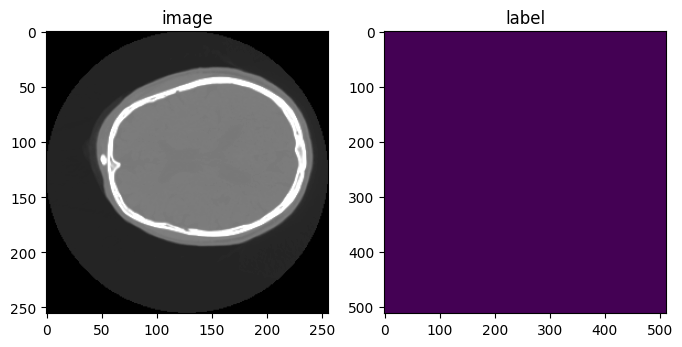

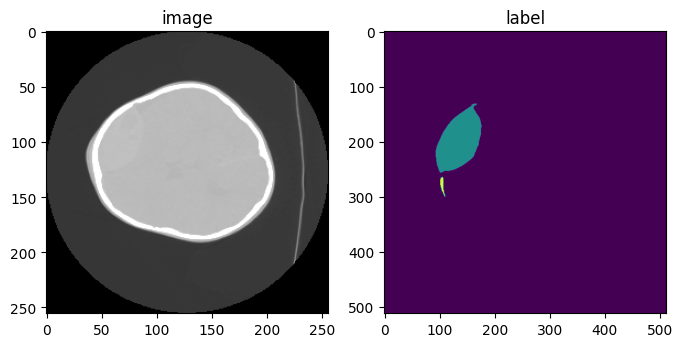

In [44]:
for file in val_files:
    data_dict = loader(file)
    image, label = data_dict["image"], data_dict["label"]
    plt.figure("visualize", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[:, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[:, :, 70])
    plt.show()

In [45]:
#Cập nhật kích thước kênh theo giả định chuyển đổi của thư viện MONAI
ensure_channel_first = EnsureChannelFirstd(keys=["image", "label"])
for file in val_files:
    data_dict = loader(file)
    datac_dict = ensure_channel_first(data_dict)
    print(f"image shape: {datac_dict['image'].shape}")

image shape: torch.Size([1, 256, 256, 128])
image shape: torch.Size([1, 256, 256, 128])


In [46]:
#Định hướng trục ban đầu
orientation = Orientationd(keys=["image", "label"], axcodes="RAS")

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 125])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -117.1233],
        [   0.0000,    0.0000,    1.2207,  -46.5000],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -117.6116],
        [   0.0000,    0.0000,    1.2500,  -46.5000],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


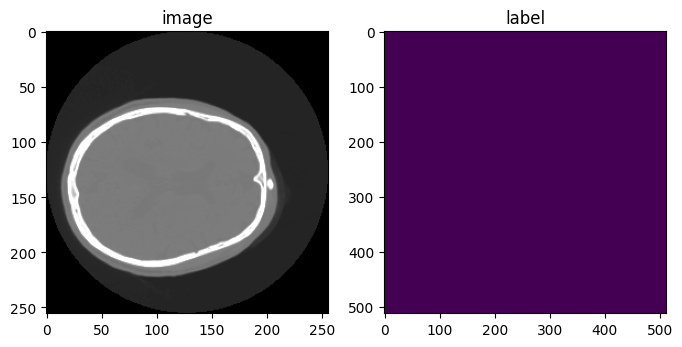

image shape: torch.Size([1, 256, 256, 128])
label shape: torch.Size([1, 512, 512, 128])
image affine after Orientation:
tensor([[   0.9766,    0.0000,    0.0000, -124.0233],
        [   0.0000,    0.9766,    0.0000, -141.9233],
        [   0.0000,    0.0000,    1.2500,  -58.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)
label affine after Orientation:
tensor([[   0.4883,    0.0000,    0.0000, -124.5116],
        [   0.0000,    0.4883,    0.0000, -142.4116],
        [   0.0000,    0.0000,    1.2500,  -58.6250],
        [   0.0000,    0.0000,    0.0000,    1.0000]], dtype=torch.float64)


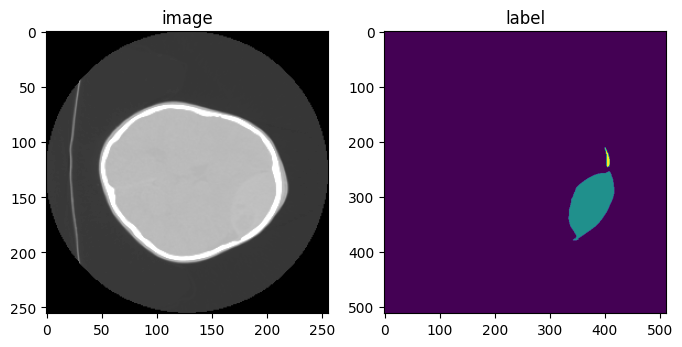

In [47]:
for file in val_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    print(f"image shape: {data_dict_orient['image'].shape}")
    print(f"label shape: {data_dict_orient['label'].shape}")
    print(f"image affine after Orientation:\n{data_dict_orient['image'].meta['affine']}")
    print(f"label affine after Orientation:\n{data_dict_orient['label'].meta['affine']}")

    image, label = data_dict_orient["image"], data_dict_orient["label"]
    plt.figure("visualise", (8, 4))
    plt.subplot(1, 2, 1)
    plt.title("image")
    plt.imshow(image[0, :, :, 70], cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("label")
    plt.imshow(label[0, :, :, 70])
    plt.show()

In [48]:
#Voxel check
# for i in range(1,4):
#     data_dict_ = loader(train_files[i])
#     data_dict_ = ensure_channel_first(data_dict_)
#     data_dict_ = orientation(data_dict_)
for file in val_files:
    data_dict = loader(file)
    data_dict_channelD = ensure_channel_first(data_dict)
    data_dict_orient = orientation(data_dict_channelD)
    print(f'[sample {file}]')
    print(f"image shape: {data_dict_orient['image'].shape}")
    print(f"label unique: {torch.unique(data_dict_orient['label'])}")
    print(f"image pixdim: {data_dict_orient['image'].pixdim}")

[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400104001.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400104001-label.nii.gz'}]
image shape: torch.Size([1, 256, 256, 128])
label unique: tensor([0., 1.])
image pixdim: tensor([0.9766, 0.9766, 1.2207], dtype=torch.float64)
[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400106729.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400106729-label.nii.gz'}]
image shape: torch.Size([1, 256, 256, 128])
label unique: tensor([0., 1., 2.])
image pixdim: tensor([0.9766, 0.9766, 1.2500], dtype=torch.float64)


In [49]:
#Voxel optimize to (1,1,1) milimet
spacing = Spacingd(keys=["image", "label"], pixdim=(1., 1., 1.), mode=("bilinear", "nearest"))

# for i in range(1,4):
#     data_dict_ = loader(train_files[i])
#     data_dict_ = ensure_channel_first(data_dict_)
#     data_dict_ = orientation(data_dict_)
#     print(f'[sample {file}]')
for file in val_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient)
    print(f'[sample {file}]')
    print(f"image shape: {DataD_voxelOpti['image'].shape}")
    print(f"label unique: {torch.unique(DataD_voxelOpti['label'])}")
    print(f"image pixdim: {DataD_voxelOpti['image'].pixdim}")

[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400104001.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400104001-label.nii.gz'}]
image shape: torch.Size([1, 250, 250, 156])
label unique: tensor([0., 1.])
image pixdim: tensor([1., 1., 1.], dtype=torch.float64)
[sample {'image': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidData\\2400106729.nii.gz', 'label': 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel\\2400106729-label.nii.gz'}]
image shape: torch.Size([1, 250, 250, 160])
label unique: tensor([0., 1., 2.])
image pixdim: tensor([1., 1., 1.], dtype=torch.float64)


In [ ]:
pip install torchio==0.18.90

In [50]:
import torchio as tio
standardize = tio.ZNormalization()

image shape: torch.Size([1, 250, 250, 156])


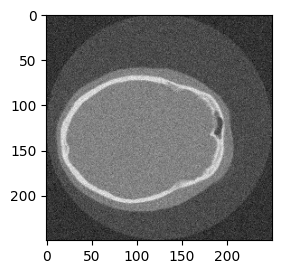

image shape: torch.Size([1, 250, 250, 160])


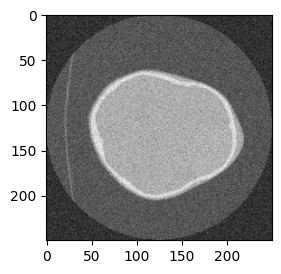

In [51]:
add_noise = tio.RandomNoise(std=0.25) 
# Lặp qua từng ảnh trong tập dữ liệu
for file in val_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient)
    
    # Áp dụng chuẩn hóa và phép biến đổi làm nhiễu || standard để thấy được cấu trúc rõ nét cho phần noise này//
    standard = standardize(DataD_voxelOpti['image'])
    noisy = add_noise(DataD_voxelOpti['image'])
    print(f"image shape: {noisy.shape}")
    # print(len(noisy))
    plt.subplot(1, 2, 2)
    plt.imshow(noisy[0, :, :, 70], cmap="gray")
    plt.show()

    tensorof_Noiseimg = noisy.numpy()
    Noiseimg = tensorof_Noiseimg.squeeze(0)
    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_noise = nib.Nifti1Image(Noiseimg, affine=None)  # Bạn cần cung cấp affine nếu có

    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    out_filename = add_suffix_to_filename(basename, suffix='gaussianNoise')
    nib.save(nifti_image_noise, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/ValidSet/Image/{out_filename}')

    # break

In [53]:
# Lấy file label trong file TrainLabel qua Intensity TrainSet/Label
import os
import shutil

thư_mục_nguồn = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel"
thư_mục_đích = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/ValidSet/Label"

if not os.path.exists(thư_mục_đích):
  os.makedirs(thư_mục_đích)

for file in val_files:
  basename = os.path.basename(file['label'])
  new_filelabelname = add_suffix_to_filename(basename, suffix='gaussianNoise')
  source_path = os.path.join(thư_mục_nguồn, basename)
  destination_path = os.path.join(thư_mục_đích, new_filelabelname)
  shutil.copy2(source_path, destination_path)


image shape: torch.Size([1, 250, 250, 156])


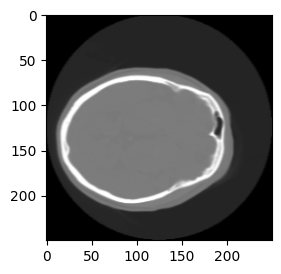

image shape: torch.Size([1, 250, 250, 160])


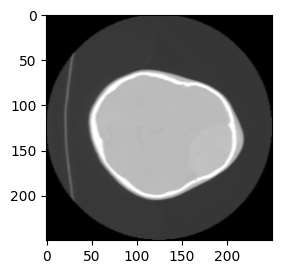

In [55]:
blur = tio.RandomBlur()
# Lặp qua từng ảnh trong tập dữ liệu
for file in val_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient)   
    blurred = blur(DataD_voxelOpti['image'])

    print(f"image shape: {blurred.shape}")
    plt.subplot(1, 2, 2)
    plt.imshow(blurred[0, :, :, 70], cmap="gray")
    plt.show()

    tensorof_Blurimg = blurred.numpy()
    Blurimg = tensorof_Blurimg.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_blur = nib.Nifti1Image(Blurimg, affine=None)  # Bạn cần cung cấp affine nếu có

    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    out_filename = add_suffix_to_filename(basename, suffix='blur')
    nib.save(nifti_image_blur, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/ValidSet/Image/{out_filename}')


In [56]:
# Lấy file label trong file TrainLabel qua Intensity TrainSet/Label
import os
import shutil

thư_mục_nguồn = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel"
thư_mục_đích = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/ValidSet/Label"

if not os.path.exists(thư_mục_đích):
  os.makedirs(thư_mục_đích)

for file in val_files:
  basename = os.path.basename(file['label'])
  new_filelabelname = add_suffix_to_filename(basename, suffix='blur')
  source_path = os.path.join(thư_mục_nguồn, basename)
  destination_path = os.path.join(thư_mục_đích, new_filelabelname)
  shutil.copy2(source_path, destination_path)


image shape: torch.Size([1, 250, 250, 156])


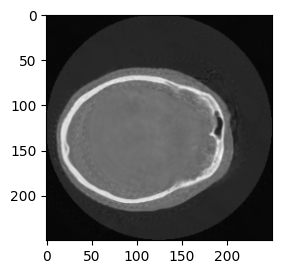

image shape: torch.Size([1, 250, 250, 160])


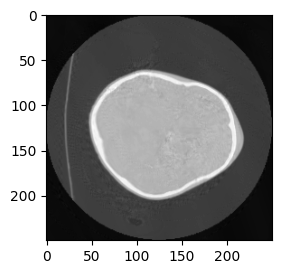

In [57]:
add_motion = tio.RandomMotion(num_transforms=6, image_interpolation='nearest') #kernel size để transform
for file in val_files:
    data_dict = loader(file)
    datac_dict_channeld = ensure_channel_first(data_dict)
    data_dict_orient = orientation(datac_dict_channeld)
    DataD_voxelOpti = spacing(data_dict_orient) 

    # Áp dụng chuẩn hóa và phép biến đổi làm dịch chuyển
    # standard = standardize(DataD_voxelOpti['image'])
    with_motion = add_motion(DataD_voxelOpti['image'])


    print(f"image shape: {with_motion.shape}")
    plt.subplot(1, 2, 2)
    plt.imshow(with_motion[0, :, :, 70], cmap="gray")
    plt.show()

    tensorof_Motionimg = with_motion.numpy()
    Motionimg = tensorof_Motionimg.squeeze(0)

    # Tạo đối tượng NIfTI từ NumPy array
    nifti_image_motion = nib.Nifti1Image(Motionimg, affine=None)  # Bạn cần cung cấp affine nếu có

    # Lưu đối tượng NIfTI thành một tệp
    basename = os.path.basename(file['image'])
    out_filename = add_suffix_to_filename(basename, suffix='motion')
    nib.save(nifti_image_motion, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/ValidSet/Image/{out_filename}')

In [58]:
# Lấy file label trong file TrainLabel qua Intensity TrainSet/Label
import os
import shutil

thư_mục_nguồn = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/ValidLabel"
thư_mục_đích = "L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/Finalize10/Augmented/Case1-Raw/Intensity/ValidSet/Label"

if not os.path.exists(thư_mục_đích):
  os.makedirs(thư_mục_đích)

for file in val_files:
  basename = os.path.basename(file['label'])
  new_filelabelname = add_suffix_to_filename(basename, suffix='motion')
  source_path = os.path.join(thư_mục_nguồn, basename)
  destination_path = os.path.join(thư_mục_đích, new_filelabelname)
  shutil.copy2(source_path, destination_path)


____________________________________________________________________________________________

adjust path, window V, intensity for label
Sau này dữ liệu khác cập nhật thì trổ file khác ra mà chạy trích xuất label cho phần Intensity cũng như nhanh hơn, hiệu quả hơn với file ảnh 10 slots per epoch (batch)

Thêm đuôi hậu tố cho file lưu label

In [146]:
# TrainSet - Label
import os
filepath = 'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/FinalizeData/TrainLabel/'

files = os.listdir(filepath)
print("Files in directory:")
for file in files:
    basename_label = os.path.basename(file)
    print(basename_label)

Files in directory:
_groundtruth_registered_ID_02b882cc_ID_a4892e60ae.nii.gz
_groundtruth_registered_ID_02f779fb_ID_c4d7f33559.nii.gz
_groundtruth_registered_ID_0b10cbee_ID_f91d6a7cd2.nii.gz
_groundtruth_registered_ID_0c6b97a9_ID_6011bb9ce8.nii.gz


torch.Size([251, 251, 164])


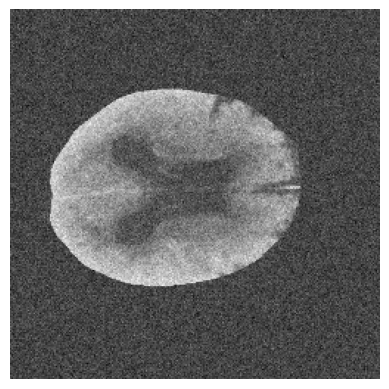

In [123]:
# import torch
# import matplotlib.pyplot as plt
# import numpy as np

# # Giả sử img là tensor có kích thước [1, 251, 251, 164]
# # img = torch.randn(1, 251, 251, 164) # Thay thế dòng này bằng dữ liệu thực tế của bạn

# # Xóa kích thước batch bằng cách sử dụng squeeze
# img = noisy.squeeze(0)
# print(img.shape)
# # Lấy dữ liệu từ tensor
# img_data = img.cpu().detach().numpy()  # Chuyển về NumPy array

# # Lấy slice trung tâm của ảnh để hiển thị
# center_slice = img_data[:, :, img_data.shape[2] // 2]

# # Hiển thị slice trung tâm của ảnh
# plt.imshow(center_slice, cmap='gray')
# plt.axis('off')
# plt.show()


In [154]:
# import ants
# # Giả sử meta_tensor là đối tượng MetaTensor bạn muốn lưu
# # Và output_file là đường dẫn của tệp bạn muốn tạo ra
# meta_tensor = noisy

# # Chuyển đổi MetaTensor thành tensor torch
# tensor = meta_tensor.numpy()
# # tensor.shape
# # Xóa kích thước batch bằng cách sử dụng squeeze
# # imgAugment = tensor.squeeze(0)

# # Chuyển đổi tensor thành NumPy array
# # numpy_array = tensor.numpy()

# # Tạo đối tượng NIfTI từ NumPy array
# nifti_image = nib.Nifti1Image(tensor, affine=None)  # Bạn cần cung cấp affine nếu có

# # Lưu đối tượng NIfTI thành một tệp
# out_filename = add_suffix_to_filename(basename, suffix='noise')
# nib.save(nifti_image, f'L:/Study_IDE/MasterReview/job/research-Paper-Linh-Duy-Thanh-Ngan-Loan-MrsNga-3D4Medical/Visualize3D-Vedo-Nifti/FinalizeData/Augmented/Intensity/TrainSet/Image/{out_filename}')
# # ants.image_write(image, f'../FinalizeData/Augmented/TrainSet/{basename}')

In [60]:
import ants
meta_tensor = noisy[0]

# Chuyển đổi MetaTensor thành tensor torch
tensor = meta_tensor.numpy()

# Tạo đối tượng NIfTI từ NumPy array
nifti_image = nib.Nifti1Image(tensor, affine=None)  # Bạn cần cung cấp affine nếu có

# Lưu đối tượng NIfTI thành một tệp
out_filename = add_suffix_to_filename(basename, suffix='noise')
nib.save(nifti_image, f'../FinalizeData/Augmented/Intensity/TrainSet/Label/{out_filename}')

In [ ]:
# saver = SaveImage(
#     output_dir=tempdir,
#     output_ext=".nii.gz",
#     output_dtype=np.uint8,
#     resample=False,
#     squeeze_end_dims=True,
#     writer="NibabelWriter",
# )
# img = saver(img)